In [1]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.mpl_style = 'default'

Populating the interactive namespace from numpy and matplotlib


In [47]:
with open('horror.p', 'r') as picklefile:
    trend = pickle.load(picklefile)


In [50]:
with open('horror1.p', 'r') as picklefile:
    df = pickle.load(picklefile)

In [51]:
with open('sport_df.p', 'r') as picklefile:
    df = pickle.load(picklefile)
trend = trend.append(df)    

In [52]:
with open('actionadventure_df.p', 'r') as picklefile:
    df = pickle.load(picklefile)
trend = trend.append(df)    

In [53]:
with open('animation_df.p', 'r') as picklefile:
    df = pickle.load(picklefile)
trend = trend.append(df)    

In [54]:
with open('superheros.p', 'r') as picklefile:
    df = pickle.load(picklefile)
trend = trend.append(df)  

In [55]:
with open('dystopian_df.p', 'r') as picklefile:
    df = pickle.load(picklefile)
trend = trend.append(df)    

In [56]:

with open('heist_df.p', 'r') as picklefile:
    df = pickle.load(picklefile)
trend = trend.append(df)  

In [57]:
trend= trend.sort('time_delta_num')

/Users/David/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [58]:
#trend = trend2
trend = trend[trend.screens > 2500]
#trend = trend[trend.time_delta_num < 1300]
#trend = trend[trend.screens > 1000]

In [59]:
trend

,index,level_0,level_1,date,screens,opening,normalized_opening,time_delta,time_delta_num,season
0,87,2005,Coach Carter,2005-01-14,2524,29168180,11556.331220,13 days 00:00:00,13,Winter
3,328,2007,The Messengers,2007-02-02,2528,14713321,5820.142801,32 days 00:00:00,32,February
0,64,2000,The Tigger Movie,2000-02-11,2723,9427532,3462.185824,41 days 00:00:00,41,Spring
2,25,2001,3000 Miles to Graceland,2001-02-23,2545,7160521,2813.564244,53 days 00:00:00,53,Spring
0,18,2002,Blade II,2002-03-22,2707,32528016,12016.260066,80 days 00:00:00,80,Spring
1,63,2000,The Road to El Dorado,2000-03-31,3218,12846652,3992.123058,90 days 00:00:00,90,Spring
8,330,2007,The Reaping,2007-04-05,2603,10025203,3851.403381,94 days 00:00:00,94,April
9,317,2007,Grindhouse,2007-04-06,2624,11596613,4419.440930,95 days 00:00:00,95,April
10,331,2007,Vacancy,2007-04-20,2551,7603376,2980.547236,109 days 00:00:00,109,April
2,57,2000,Dinosaur,2000-05-19,3257,38854851,11929.644151,139 days 00:00:00,139,Summer


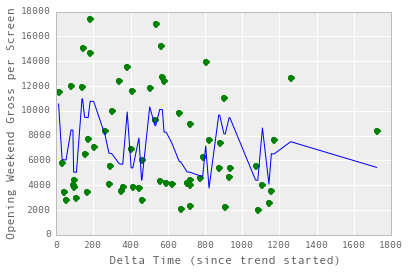

In [66]:
def sort_season(x):
    if x == 1:
        return 'January'
    if x == 2:
        return 'February'
    if x == 3:
        return 'March'
    if x == 4:
        return 'April'
    if x == 5:
        return 'May'
    if x == 6:
        return 'June'
    if x == 7:
        return 'July'
    if x == 8:
        return 'August'
    if x == 9:
        return 'September'
    if x == 10:
        return 'October'
    if x == 12:
        return 'November'
    if x == 12:
        return 'December'

trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num+ season', data = trend, return_type= 'dataframe')
model = sm.OLS(y, X)

plt.ylabel('Opening Weekend Gross per Screen')
plt.xlabel('Delta Time (since trend started)')
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')

In [67]:
trend

,index,level_0,level_1,date,screens,opening,normalized_opening,time_delta,time_delta_num,season
0,87,2005,Coach Carter,2005-01-14,2524,29168180,11556.331220,13 days 00:00:00,13,January
3,328,2007,The Messengers,2007-02-02,2528,14713321,5820.142801,32 days 00:00:00,32,February
0,64,2000,The Tigger Movie,2000-02-11,2723,9427532,3462.185824,41 days 00:00:00,41,February
2,25,2001,3000 Miles to Graceland,2001-02-23,2545,7160521,2813.564244,53 days 00:00:00,53,February
0,18,2002,Blade II,2002-03-22,2707,32528016,12016.260066,80 days 00:00:00,80,March
1,63,2000,The Road to El Dorado,2000-03-31,3218,12846652,3992.123058,90 days 00:00:00,90,March
8,330,2007,The Reaping,2007-04-05,2603,10025203,3851.403381,94 days 00:00:00,94,April
9,317,2007,Grindhouse,2007-04-06,2624,11596613,4419.440930,95 days 00:00:00,95,April
10,331,2007,Vacancy,2007-04-20,2551,7603376,2980.547236,109 days 00:00:00,109,April
2,57,2000,Dinosaur,2000-05-19,3257,38854851,11929.644151,139 days 00:00:00,139,May


In [68]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     normalized_opening   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     1.771
Date:                Wed, 02 Dec 2015   Prob (F-statistic):             0.0830
Time:                        14:43:22   Log-Likelihood:                -623.86
No. Observations:                  65   AIC:                             1272.
Df Residuals:                      53   BIC:                             1298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept            5231.1522   1681.069      3.112      0.003      1859.355  8602.949
season[T.August]     4092.0766   3241.883      1.262      0.212     -2410.317  1.06e+04
season[T.February]    893.0267   2086.518      0.428      0.670     -3291.998  5078.052
season[T.January]    5355.4827   2800.732      1.912      0.061      -262.074   1.1e+04
season[T.July]       5873.8760   2146.276      2.737      0.008      1568.992  1.02e+04
season[T.June]       4522.3516   2158.324      2.095      0.041       193.302  8851.401
season[T.March]      3369.9196   2314.099      1.456      0.151     -1271.576  8011.415
season[T.May]        5986.0474   2402.082      2.492      0.016      1168.081  1.08e+04
season[T.November]   1095.6228   2093.382      0.523      0.603     -3103.169  5294.415
season[T.October]    1853.8923   2394.723      0.774      0.442     -2949.314  6657.099
season[T.September]  3270.7450   2889.127      1.132      0.263     -2524.110  9065.600
time_delta_num         -1.7808      1.406     -1.267      0.211        -4.600     1.039
==============================================================================
Omnibus:                        5.085   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                3.116
Skew:                           0.344   Prob(JB):                        0.211
Kurtosis:                       2.176   Cond. No.                     7.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
magnitude = 1261*3800*-5.43

In [86]:
magnitude

-26019474.0

In [65]:
trend['screens'].mean()

3298.5625

In [66]:
trend['time_delta_num'].mean()

627.875

In [69]:
627*3298*-5.43

-11228403.78